# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [68]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns  # Plots!
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [10]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 admits, 398 gre, 398 gpa, 399 prestige. There is a tiny percentage of missing data.

#### Question 2. Create a summary table

In [21]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [20]:
df_raw.

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scale of GRE is 200-800, while the scale of GPA is 0-4.0. Therefore, in absolute terms, any variation in GRE will be greater than GPA.

#### Question 4. Drop data points with missing data


In [39]:
df = df_raw.dropna()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: After running .describe() I now see that the quantiles are defined, whereas before they rendered NaN

In [40]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

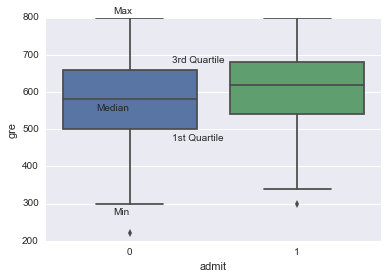

In [65]:
#boxplot 1
boxplot1 = sns.boxplot("admit", "gre", data=df)
boxplot1.text(x=0.25, y=680, s="3rd Quartile")
boxplot1.text(x=-.2, y=550, s="Median")
boxplot1.text(x=0.25, y=470, s="1st Quartile")
boxplot1.text(x=-0.1, y=270, s="Min")
boxplot1.text(x=-0.1, y=810, s="Max")

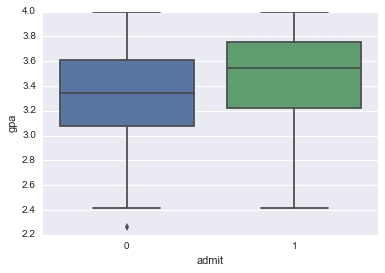

In [63]:
#boxplot 2 
boxplot2 = sns.boxplot("admit", "gpa", data=df)

#### Question 7. What do this plots show?

Answer: They seem to indicate that admits had a distribution centered on a higher median for gpa and gre scores

#### Question 8. Describe each distribution 

In [84]:
# GRE dist for positive admits
admit1_gre = df[(df['admit'] == 1) & (df["gre"]) ]
admit1_gre["gre"].describe()

count    126.000000
mean     618.571429
std      109.257233
min      300.000000
25%      540.000000
50%      620.000000
75%      680.000000
max      800.000000
Name: gre, dtype: float64

In [85]:
# GRE dist for negative admits
admit0_gre = df[(df['admit'] == 0) & (df["gre"]) ]
admit0_gre["gre"].describe()

count    271.000000
mean     573.579336
std      116.052798
min      220.000000
25%      500.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

In [87]:
# GPA dist for positive admits
admit1_gpa = df[(df['admit'] == 1) & (df["gpa"]) ]
admit1_gpa["gpa"].describe()

count    126.000000
mean       3.489206
std        0.371655
min        2.420000
25%        3.220000
50%        3.545000
75%        3.757500
max        4.000000
Name: gpa, dtype: float64

In [113]:
# GPA dist for negative admits
admit0_gre = df[(df['admit'] == 0) & (df["gpa"]) ]
admit0_gre["gpa"].describe()

count    271.000000
mean       3.347159
std        0.376355
min        2.260000
25%        3.080000
50%        3.340000
75%        3.610000
max        4.000000
Name: gpa, dtype: float64

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

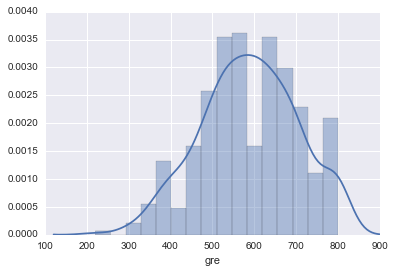

In [115]:
# GRE distribution and description
dist_gre = sns.distplot(df["gre"])

In [125]:
# skewness of GRE reveals distribution is skewed to the right
df["gre"].skew()

-0.146046988215597

In [124]:
df["gpa"].skew()

-0.21688893296924305

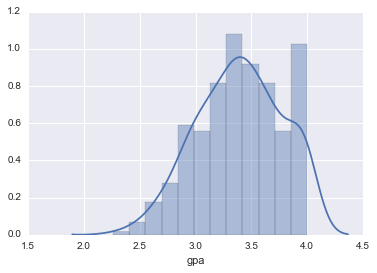

In [114]:
# GPA distribution and description
dist_gre = sns.distplot(df["gpa"])

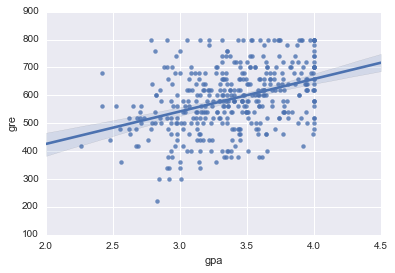

In [123]:
plt = sns.regplot("gpa", "gre", data=df)

Answer: The distribution is fairly skewed and is potentially not normally distributed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, we could do a log transformation.

#### Question 11. Which of our variables are potentially colinear? 

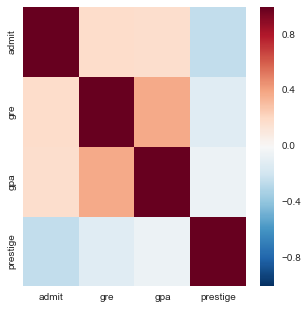

In [95]:
# create a correlation matrix for the data
plt.figure(figsize=(5,5))
sns.heatmap(df.corr())

In [94]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Unsurprisingly, the most colinear variables are gre and gpa, potentially because they are both a proxy for some sort of "intellectual capability" or "preparedness" metric. Surprisingly, prestige was slightly negatively correlated with all the other three variables.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:
1. Assess summary statistics of prestige
2. Assess boxplots of admit x prestige
3. Assess outliers

#### Question 14. What is your hypothesis? 

Answer: 
- Null: prestige is NOT a predictor of admit
- Alternative: prestige is a predictor of admit
- Reject null:
    - If p<=0.5
- Otherwise:
    - Fail to reject

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data